In [14]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/one_hot_truncated.csv",
                        parse_dates=['appl_sbm_tm'])

In [3]:
data['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [4]:
data['appl_sbm_tm'].head()

0   2017-04-08 19:10:13
1   2016-06-08 15:20:21
2   2016-04-27 11:36:27
3   2017-03-30 08:45:55
4   2016-11-30 11:40:38
Name: appl_sbm_tm, dtype: datetime64[ns]

In [8]:
target_zero = data[data['target']==1]
target_one = data[data['target']==0]

In [11]:
target_zero.shape

(3388, 114)

In [9]:
target_one.shape

(117541, 114)

In [7]:
data.shape

(120929, 114)

In [41]:
data['appl_sbm_tm'] = data['appl_sbm_tm'].apply(lambda x: str(x)[:10])

In [42]:
zero_count = data.groupby(by=['appl_sbm_tm']).apply(
    lambda x: x['target'][(x['target'] == 0).values].count()).reset_index(name='non_default')

In [43]:
one_count = data.groupby(by=['appl_sbm_tm']).apply(
    lambda x: x['target'][(x['target'] == 1).values].count()).reset_index(name='default')

In [44]:
combine = pd.merge(one_count, zero_count, on=['appl_sbm_tm'], how='left')

In [45]:
combine['appl_sbm_tm'] = combine['appl_sbm_tm'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

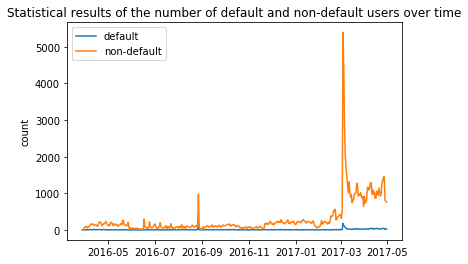

In [46]:
plt.plot(combine['appl_sbm_tm'], combine['default'], label="default")
plt.plot(combine['appl_sbm_tm'], combine['non_default'], label="non-default")
plt.legend()
plt.ylabel('count')
plt.title('Statistical results of the number of default and non-default users over time')
plt.show()

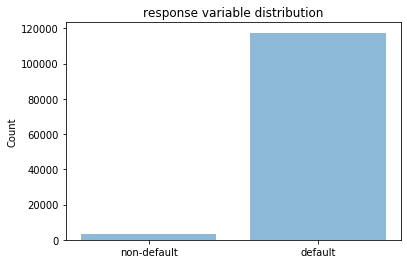

In [17]:
# plot the number of default and non-default users
performance = [target_zero.shape[0], target_one.shape[0]]
objects = ('non-default', 'default')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('response variable distribution')

plt.show()

### count the missing rate for each column

In [101]:
for column in data:
    print('{}, {}'.format(column, data[column].dtypes))

appl_sbm_tm, datetime64[ns]
target, int64
id, object
id_card_x, object
auth_time, object
phone, object
spt_id_card_x, int64
phone_exist_x, int64
auth_time_year, int64
auth_time_month, int64
auth_time_day, int64
birthday, object
id_card_y, object
credit_score, float64
overdraft, float64
quota, float64
remaining, float64
using_rate, float64
inverse_credit_score, float64
hour, int64
month, int64
year, int64
nan_num, int64
diff_day, float64
how_old, float64
the_same_id, int64
exist_phone, int64
bank_name_len, int64
tail_num_len, int64
Online Pay, int64
Cash on Delivery, int64
is_double, int64
is_0_0_0, int64
is_0000_00_00, int64
is_0001_1_1, int64
AH, int64
BJ, int64
CQ, int64
FJ, int64
GD, int64
GS, int64
GX, int64
GZ, int64
HA, int64
HB, int64
HE, int64
HI, int64
HK, int64
HL, int64
HN, int64
JL, int64
JS, int64
JX, int64
LN, int64
NM, int64
NX, int64
QH, int64
SC, int64
SD, int64
SH, int64
SN, int64
SX, int64
TJ, int64
TW, int64
XJ, int64
XZ, int64
YN, int64
ZJ, int64
unknown, int64
rec

In [77]:
count = 0
record = dict()
for column in data:
    if 0 in data[column].unique() and len(column) > 2 and column != 'target':
        record[column] = data[data[column]==0].shape[0] / data[column].shape[0]
        count += 1
print(count)

71


In [79]:
missing_rate = pd.DataFrame(record.items(), columns=['feature', 'missing rate'])

In [90]:
missing_rate.sort_values(by='missing rate', axis=0, ascending=False).head(50)

,feature,missing rate
22,is_0001_1_1,1.000000
19,is_double,1.000000
21,is_0000_00_00,1.000000
20,is_0_0_0,1.000000
59,degree_PhD,0.999868
58,degree_Others,0.999760
56,degree_Master,0.999496
41,merriage_No Disclosure,0.999214
47,income_Below 2000,0.998652
57,degree_Middle School,0.995882


In [93]:
new = data.drop(columns = "is_0001_1_1")
new = new.drop(columns = "is_double")
new = new.drop(columns = "is_0000_00_00")
new = new.drop(columns = "is_0_0_0")
new = new.drop(columns = "is_industry")
new = new.drop(columns = "is_idcard")

In [94]:
new.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/train_data_truncated.csv')

### apply heatmap

In [32]:
res = []
for column in data:
    if len(column) > 2 and column != 'target' and 'degree' not in column and 'sex' not in column: 
        res.append(column)
res

['appl_sbm_tm',
 'phone',
 'spt_id_card_x',
 'phone_exist_x',
 'auth_time_year',
 'auth_time_month',
 'auth_time_day',
 'birthday',
 'credit_score',
 'overdraft',
 'quota',
 'remaining',
 'using_rate',
 'inverse_credit_score',
 'hour',
 'month',
 'year',
 'nan_num',
 'diff_day',
 'how_old',
 'the_same_id',
 'exist_phone',
 'bank_name_len',
 'tail_num_len',
 'Online Pay',
 'Cash on Delivery',
 'unknown',
 'receive_phone_count',
 'unique_fix_phone',
 'bank_phone_num',
 'is_hobby',
 'day_order_max',
 'day_order_min',
 'order_time',
 'order_mean',
 'unit_price_mean',
 'order_time_set',
 'order_std',
 'order_skew',
 'order_sum',
 'merriage_Married',
 'merriage_No Disclosure',
 'merriage_Single',
 'merriage_unknown',
 'income_2000-3999',
 'income_4000-5999',
 'income_6000-7999',
 'income_Below 2000',
 'income_above 8000',
 'income_unknown',
 'qq_bound_Bounded',
 'qq_bound_Not Bounded',
 'qq_bound_unknown',
 'wechat_bound_Bounded',
 'wechat_bound_Not Bounded',
 'wechat_bound_unknown',
 'accou

In [27]:
data = data.drop('Unnamed: 0', axis=1)

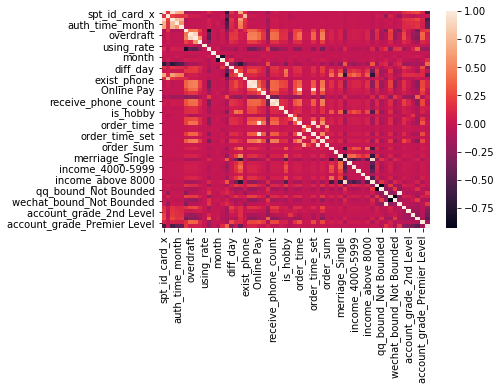

In [33]:
# correlations between all the features
corr = data[res].corr()

# show heapmap of correlations
sns.heatmap(corr)
plt.show()

### generate new data file (delete high missing rate features)

In [2]:
one_hot = pd.read_csv("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/train_data_one_hot.csv",
                        parse_dates=['appl_sbm_tm'])
data = pd.read_csv("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/train_data.csv",
                        parse_dates=['appl_sbm_tm'])

In [8]:
for column in one_hot:
    print('{}, {}'.format(column, one_hot[column].dtypes))

appl_sbm_tm, datetime64[ns]
target, int64
id, object
id_card_x, object
auth_time, object
phone, object
spt_id_card_x, int64
phone_exist_x, int64
auth_time_year, int64
auth_time_month, int64
auth_time_day, int64
birthday, object
id_card_y, object
credit_score, float64
overdraft, float64
quota, float64
remaining, float64
using_rate, float64
inverse_credit_score, float64
hour, int64
month, int64
year, int64
nan_num, int64
diff_day, float64
how_old, float64
the_same_id, int64
exist_phone, int64
bank_name_len, int64
tail_num_len, int64
Online Pay, int64
Cash on Delivery, int64
is_double, int64
is_0_0_0, int64
is_0000_00_00, int64
is_0001_1_1, int64
AH, int64
BJ, int64
CQ, int64
FJ, int64
GD, int64
GS, int64
GX, int64
GZ, int64
HA, int64
HB, int64
HE, int64
HI, int64
HK, int64
HL, int64
HN, int64
JL, int64
JS, int64
JX, int64
LN, int64
NM, int64
NX, int64
QH, int64
SC, int64
SD, int64
SH, int64
SN, int64
SX, int64
TJ, int64
TW, int64
XJ, int64
XZ, int64
YN, int64
ZJ, int64
unknown, int64
rec

In [12]:
dummy_df = pd.get_dummies(one_hot.loc[:,'phone'])
# add one-hot features
data_copy = pd.concat([one_hot, dummy_df], axis=1)
data_copy = data_copy.fillna(0)
data_copy.head()

,appl_sbm_tm,target,id,id_card_x,auth_time,phone,spt_id_card_x,phone_exist_x,auth_time_year,auth_time_month,...,account_grade_2nd Level,account_grade_3rd Level,account_grade_Initial Level,account_grade_Premier Level,account_grade_unknown,0,China Mobile,China Telecom,China Unicom,Other
0,2017-04-08 19:10:13,0,600689284231467016,4****************2,2017-03-05,China Mobile,1,1,2017,3,...,0,0,0,0,1,0,1,0,0,0
1,2016-06-08 15:20:21,0,20160608150003808365,2****************3,2016-01-31,China Mobile,1,1,2016,1,...,0,0,0,0,1,0,1,0,0,0
2,2016-04-27 11:36:27,0,20160427110002485018,4****************7,2017-06-18,China Mobile,1,1,2017,6,...,0,1,0,0,0,0,1,0,0,0
3,2017-03-30 08:45:55,0,593852820159991816,0,0,China Unicom,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2016-11-30 11:40:38,0,506970882778861832,6****************2,2017-12-15,China Mobile,1,1,2017,12,...,0,0,0,0,1,0,1,0,0,0


In [13]:
data_copy = data_copy.drop('phone', axis=1)

In [15]:
data_copy.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/train_data_one_hot.csv')

In [16]:
one_hot['auth_time'].unique()

array(['2017-03-05', '2016-01-31', '2017-06-18', ..., '2018-01-01',
       '2014-02-24', '2014-09-25'], dtype=object)

In [17]:
hot_data = one_hot.drop(columns = "id_card_x")
hot_data = hot_data.drop(columns = "id")
hot_data = hot_data.drop(columns = "auth_time")
hot_data = hot_data.drop(columns = "id_card_y")

In [19]:
hot_data = hot_data.drop(columns = "is_0001_1_1")
hot_data = hot_data.drop(columns = "is_double")
hot_data = hot_data.drop(columns = "is_0000_00_00")
hot_data = hot_data.drop(columns = "is_0_0_0")
hot_data = hot_data.drop(columns = "is_industry")
hot_data = hot_data.drop(columns = "is_idcard")

In [20]:
hot_data.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/one_hot_truncated.csv')

In [22]:
new_data = data.drop(columns = "id_card_x")
new_data = new_data.drop(columns = "id")
new_data = new_data.drop(columns = "auth_time")
new_data = new_data.drop(columns = "id_card_y")
new_data = new_data.drop(columns = "is_0001_1_1")
new_data = new_data.drop(columns = "is_double")
new_data = new_data.drop(columns = "is_0000_00_00")
new_data = new_data.drop(columns = "is_0_0_0")
new_data = new_data.drop(columns = "is_industry")
new_data = new_data.drop(columns = "is_idcard")
new_data.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/data_truncated.csv')

### convert string type to numeric 

In [37]:
#data = data.drop('Unnamed: 0', axis=1)
#data = data.drop('Unnamed: 0.1', axis=1)
data.to_csv('C:/Users/Vance He/Desktop/UMich/2020_WN/STATS507/project/project/data/processed_data/one_hot_truncated.csv', index=False)

In [15]:
for column in data:
    print('{}, {}'.format(column, data[column].dtypes))

appl_sbm_tm, datetime64[ns]
target, int64
spt_id_card_x, int64
phone_exist_x, int64
auth_time_year, int64
auth_time_month, int64
auth_time_day, int64
birthday, object
credit_score, float64
overdraft, float64
quota, float64
remaining, float64
using_rate, float64
inverse_credit_score, float64
hour, int64
month, int64
year, int64
nan_num, int64
diff_day, float64
how_old, float64
the_same_id, int64
exist_phone, int64
bank_name_len, int64
tail_num_len, int64
Online Pay, int64
Cash on Delivery, int64
AH, int64
BJ, int64
CQ, int64
FJ, int64
GD, int64
GS, int64
GX, int64
GZ, int64
HA, int64
HB, int64
HE, int64
HI, int64
HK, int64
HL, int64
HN, int64
JL, int64
JS, int64
JX, int64
LN, int64
NM, int64
NX, int64
QH, int64
SC, int64
SD, int64
SH, int64
SN, int64
SX, int64
TJ, int64
TW, int64
XJ, int64
XZ, int64
YN, int64
ZJ, int64
unknown, int64
receive_phone_count, int64
unique_fix_phone, int64
bank_phone_num, int64
is_hobby, int64
day_order_max, float64
day_order_min, float64
order_time, float64


In [28]:
min_time = min(data['appl_sbm_tm'])

In [29]:
data['appl_tm_num'] = data['appl_sbm_tm'].apply(lambda x: x-min_time)

In [35]:
data['appl_tm_num'] = data['appl_tm_num'].dt.days

In [36]:
data['appl_tm_num'].head()

0    376
1     72
2     30
3    366
4    247
Name: appl_tm_num, dtype: int64

In [39]:
max(data['birthday'])

'1999-12-12'